In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd

**Baca DATA**

In [3]:
train_data = pd.read_csv(r'C:\Users\wifan\ATSMachineLearning\img\emnist-bymerge-train.csv') 
test_data = pd.read_csv(r'C:\Users\wifan\ATSMachineLearning\img\emnist-bymerge-test.csv')

X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28)
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28)
y_test = test_data.iloc[:, 0].values

**Fitur HOG**

In [5]:
def extract_hog_features(images):
    features = []
    for image in images:
        hog_feature = hog(image.reshape(28, 28), orientations=9, 
                          pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                          visualize=False)
        features.append(hog_feature)

    return np.array(features)

In [6]:
X_train = extract_hog_features(train_data.iloc[:100, 1:].values)  
y_train = train_data.iloc[:100, 0].values

In [7]:
print(X_train.shape)

(100, 144)


In [8]:
X_test = extract_hog_features(test_data.iloc[:100, 1:].values) 
y_test = test_data.iloc[:100, 0].values

In [9]:
print(X_test.shape)

(100, 144)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Tuning SVC**

In [12]:
clf = SVC(kernel='linear', C=5, gamma='scale')  
clf.fit(X_train, y_train)  

SVC(C=5, kernel='linear')

**Menghitung Matriks**

In [14]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Hasil Matriks**

In [16]:

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Accuracy: 0.43
Precision: 0.42
F1 Score: 0.37


In [17]:
loo = LeaveOneOut()
accuracies = []

for train_index, test_index in loo.split(X_train):
    X_train_loo, X_test_loo = X_train[train_index], X_train[test_index]
    y_train_loo, y_test_loo = y_train[train_index], y_train[test_index]
    
    clf.fit(X_train_loo, y_train_loo)
    y_pred_loo = clf.predict(X_test_loo)
    accuracies.append(accuracy_score(y_test_loo, y_pred_loo))

# Menghitung akurasi rata-rata LOOCV
average_accuracy = np.mean(accuracies)
print(f"Average LOOCV Accuracy: {average_accuracy:.2f}")

Average LOOCV Accuracy: 0.53


E:\Anaconda\Lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


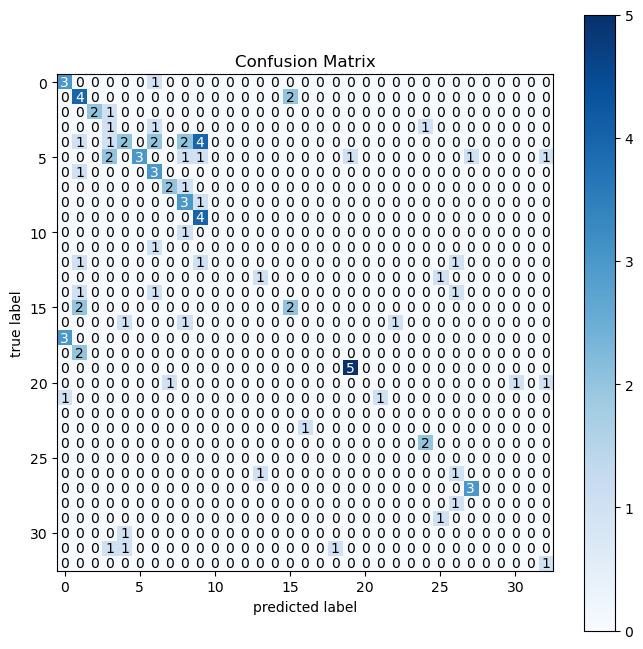

In [18]:
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 8), colorbar=True)
plt.title("Confusion Matrix")
plt.show()